## Submission Code for Tradexa Project
#### This code processes the Tradexa dataset, builds a machine learning model to predict 3-year returns and determines the optimal allocation based on the model's predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reload the original Excel file and convert to CSV
excel_path = "Tradexa Internship Assignment.xlsx"
df = pd.read_excel(excel_path, sheet_name="Dataset")

# Save as CSV
csv_path = "Tradexa.csv"
df.to_csv(csv_path, index=False)

csv_path


'Tradexa.csv'

In [3]:
# Display first few rows
df.head()

,Fund Number,Market Cap,Type,Risk,Assets,Turnover Ratio(%),SD,Sharpe Ratio,1YrReturn%,3YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio,Star Rating
0,RF040,Large,Growth,Average,8524.94,112.0,9.51,1.91,11.08,19.29,17.00,8.82,0.82,Four
1,RF147,Large,Value,Average,942.15,26.0,10.41,1.88,11.89,18.20,14.60,9.26,0.95,Four
2,RF221,Mid-Cap,Growth,High,374.63,63.4,15.24,1.88,-4.34,12.63,13.02,12.98,1.35,Three
3,RF309,Mid-Cap,Value,Average,1478.08,6.0,9.51,1.86,7.95,16.48,15.15,7.40,0.69,Two
4,RF028,Large,Growth,Average,13634.38,5.0,10.93,1.85,11.52,21.55,19.59,8.83,1.15,Four


In [4]:
# Check shape of the dataset
print("Dataset Shape:", df.shape)

# Display data types and non-null counts
df.info()

# Basic statistics
df.describe().T

Dataset Shape: (407, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fund Number        407 non-null    object 
 1   Market Cap         407 non-null    object 
 2   Type               407 non-null    object 
 3   Risk               407 non-null    object 
 4   Assets             407 non-null    float64
 5   Turnover Ratio(%)  407 non-null    float64
 6   SD                 407 non-null    float64
 7   Sharpe Ratio       407 non-null    float64
 8   1YrReturn%         407 non-null    float64
 9   3YrReturn%         407 non-null    float64
 10  5YrReturn%         407 non-null    float64
 11  10YrReturn%        407 non-null    float64
 12  Expense Ratio      407 non-null    float64
 13  Star Rating        407 non-null    object 
dtypes: float64(9), object(5)
memory usage: 44.6+ KB


,count,mean,std,min,25%,50%,75%,max
Assets,407.0,2055.819386,6777.361885,5.21,115.385,413.11,1492.725,106837.31
Turnover Ratio(%),407.0,71.802457,89.503894,0.00,29.500,51.00,83.500,689.00
SD,407.0,11.394079,1.769692,6.40,10.225,11.02,12.370,19.13
Sharpe Ratio,407.0,1.324644,0.296612,0.17,1.140,1.35,1.540,1.91
1YrReturn%,407.0,7.813538,5.439464,-14.05,4.685,8.94,11.655,21.70
3YrReturn%,407.0,15.145799,2.995588,1.53,13.520,15.34,17.085,30.89
5YrReturn%,407.0,14.303268,2.330909,5.06,12.925,14.55,15.660,22.83
10YrReturn%,407.0,7.582113,1.709281,0.94,6.615,7.59,8.605,17.11
Expense Ratio,407.0,1.225627,0.317282,0.29,1.020,1.20,1.360,2.71


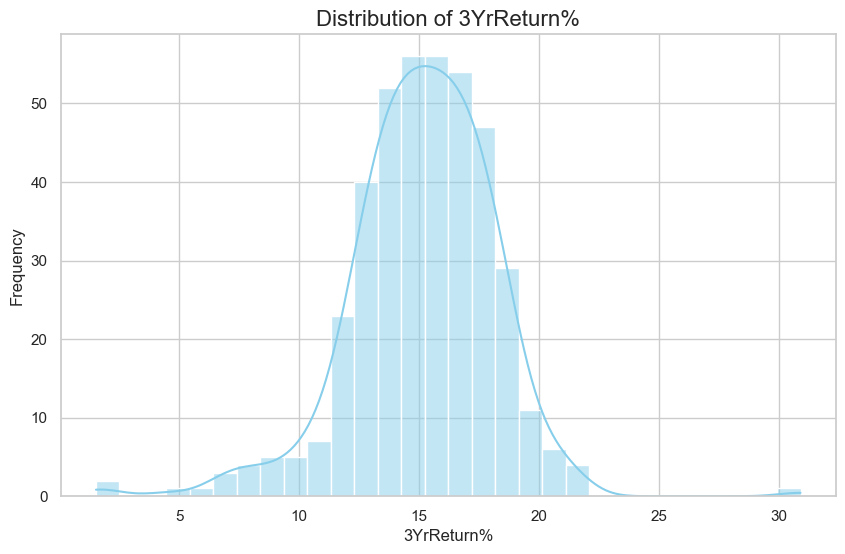

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(df["3YrReturn%"], kde=True, bins=30, color="skyblue")

# Title and labels
plt.title("Distribution of 3YrReturn%", fontsize=16)
plt.xlabel("3YrReturn%", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()


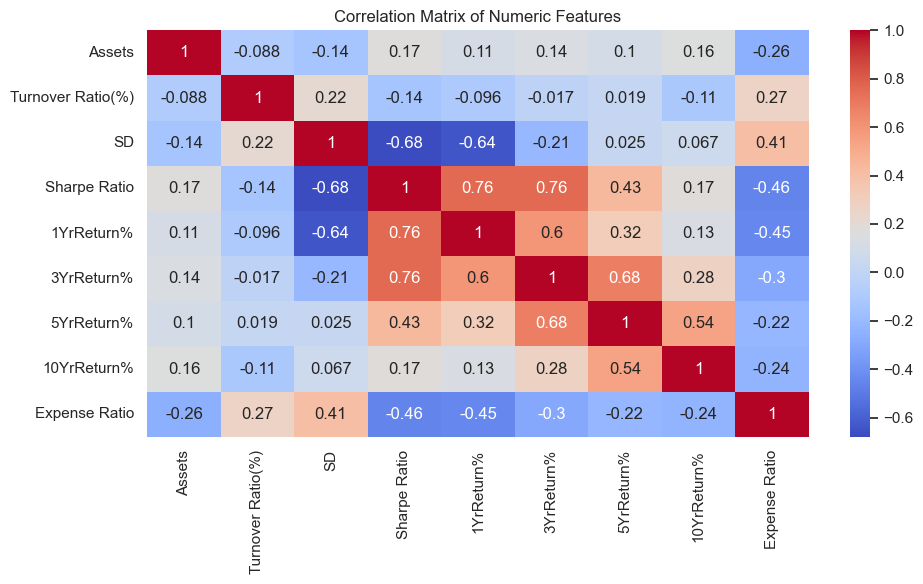

In [6]:
# ----- 2. Correlation Heatmap -----
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

Lower bound: 8.17
Upper bound: 22.43
Original dataset shape: (407, 14)
Cleaned dataset shape: (395, 14)
Removed 12 outlier rows.


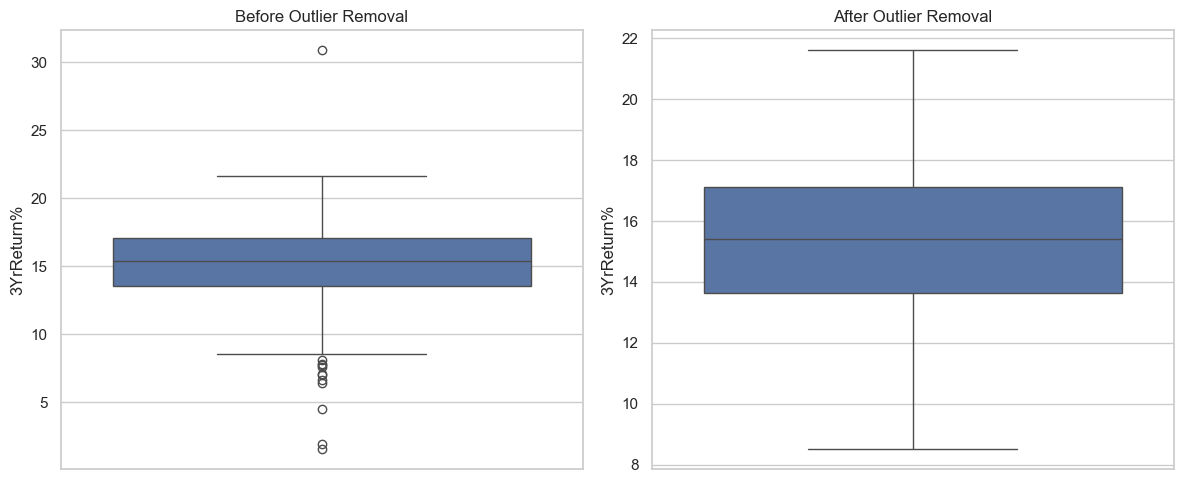

In [7]:

# Choose the column to clean
target_column = '3YrReturn%'

# Step 1: Calculate IQR
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Step 3: Filter out outliers
df_clean = df[(df[target_column] >= lower_bound) & (df[target_column] <= upper_bound)]

# Step 4: Display results
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} outlier rows.")

# Optional: visualize before/after
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df[target_column])
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean[target_column])
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [8]:
# After filtering out outliers:
df_clean = df_clean.copy()

# Feature engineering
df_clean['Assets_x_Sharpe'] = df_clean['Assets'] * df_clean['Sharpe Ratio']
star_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df_clean['Star_Rating_Code'] = df_clean['Star Rating'].map(star_map)
df_clean['Return_1Yr'] = df_clean['1YrReturn%']

In [9]:
# Features & target
categorical = ['Market Cap', 'Type', 'Risk']
numeric = ['Assets', 'Turnover Ratio(%)', 'SD', 'Sharpe Ratio', 'Expense Ratio', 'Assets_x_Sharpe', 'Star_Rating_Code', 'Return_1Yr']
X = df_clean[categorical + numeric]
y = df_clean['3YrReturn%']

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor & pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])
pipeline = Pipeline([('preproc', preprocessor), ('rf', RandomForestRegressor(random_state=42))])

# RandomizedSearchCV
param_distributions={
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__max_features': [None, 'sqrt', 'log2', 0.5],
        'rf__bootstrap': [True, False],
    }
search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=5, scoring='r2', random_state=42,error_score='raise', n_jobs=1)
search.fit(X_train, y_train)

# Eval
best_cv = search.best_score_
y_pred = search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
best_params = search.best_params_

print(f"Best CV R²: {best_cv:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")


Best CV R²: 0.742
Test RMSE: 1.358
Test R²: 0.728

Best Hyperparameters:
rf__n_estimators: 300
rf__min_samples_leaf: 2
rf__max_features: None
rf__max_depth: 20
rf__bootstrap: True


In [11]:
from joblib import dump, load
from itertools import product

# 1. Save the trained model
dump(search.best_estimator_, "best_rf_model.joblib")

# 2. Load model (for demonstration)
model = load("best_rf_model.joblib")

# 3. Build DataFrame of all Market Cap × Type × Risk combos
markets = df_clean['Market Cap'].unique()
types   = df_clean['Type'].unique()
risks   = df_clean['Risk'].unique()

rows = []
for m, t, r in product(markets, types, risks):
    # get mean of numeric features for this segment
    seg = df_clean[(df_clean['Market Cap']==m)&
                   (df_clean['Type']==t)&
                   (df_clean['Risk']==r)]
    if len(seg)==0:
        continue
    mean_vals = seg[numeric].mean().to_dict()
    rows.append({**{'Market Cap':m,'Type':t,'Risk':r}, **mean_vals})

combo_df = pd.DataFrame(rows)

# 4. Predict 3-year return for each segment
combo_df['Pred_3YrReturn'] = model.predict(combo_df[categorical + numeric])

# 5. Find the best segment
best = combo_df.loc[combo_df['Pred_3YrReturn'].idxmax()]

print("Optimal allocation → 100% to:")
print(f"  Market Cap: {best['Market Cap']}")
print(f"  Type:       {best['Type']}")
print(f"  Risk:       {best['Risk']}")
print(f"Predicted 3YrReturn%: {best['Pred_3YrReturn']:.2f}%")

Optimal allocation → 100% to:
  Market Cap: Mid-Cap
  Type:       Value
  Risk:       High
Predicted 3YrReturn%: 19.10%
